In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis.analysis import Txt_Reading
import pandas as pd
import os
from tqdm.notebook import tqdm as tqdm

%matplotlib inline

In [2]:
folder = "1nM"
f_MAX = [10, 15, 20, 25, 30, 35]
f_max = f_MAX[0]
reading = Txt_Reading(folder, f_max)

100%|██████████| 7/7 [00:00<00:00, 207.79it/s]

All trajectories have already been categorized


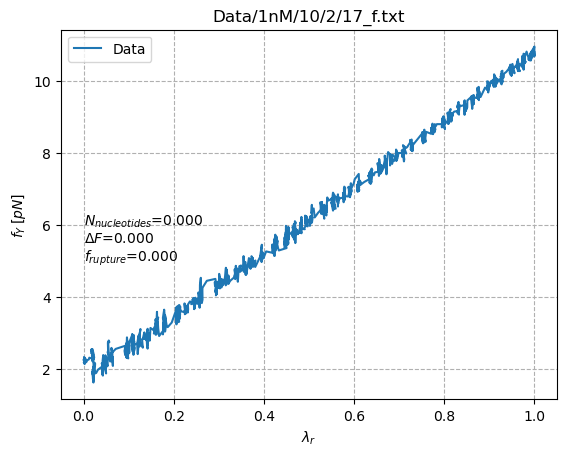

In [3]:
file = reading.readTxt(number=2, N=17, ty='f', graph=True)

In [4]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,0,0,0,0,0,0,0,0,0,0,0,0


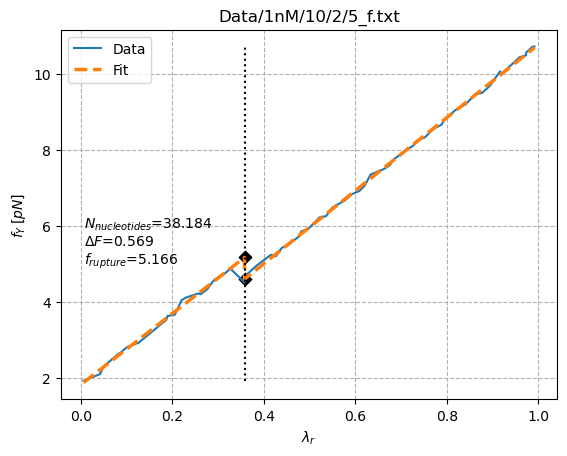

In [5]:
file = reading.readTxt(number=2, N=5, ty='f', graph=True)

In [6]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,5.165614,4.596678,12.697619,38.183512,0.049616,1.98884,0.357977,9.345039,1.820304,9.60173,1.159479,2


In [7]:
# plt.plot(reading.λ[:600], reading.force_Y[:600])
# plt.scatter(reading.λ_0, reading.f_rupture, marker="^", c="red")
# plt.scatter(reading.λ[(reading.index+1)[0]], reading.f_rupture_next, marker="v", c="orange", s=1000);

In [8]:
reading.f_rupture, reading.f_rupture_next

([5.1656142537334455], [4.596678429366867])

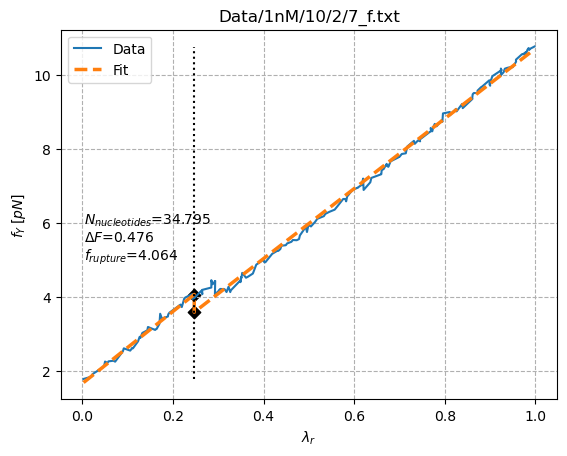

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,4.064243,3.588463,10.420057,34.795142,0.050868,1.94122,0.246885,9.721528,1.664142,9.442919,1.257146,2


In [9]:
file = reading.readTxt(number=2, N=7, ty='f', graph=True)
reading.params_df

In [10]:
# Columns: CycleCount, X_force,	Y_force, Z_force, time(sec), Status, λ

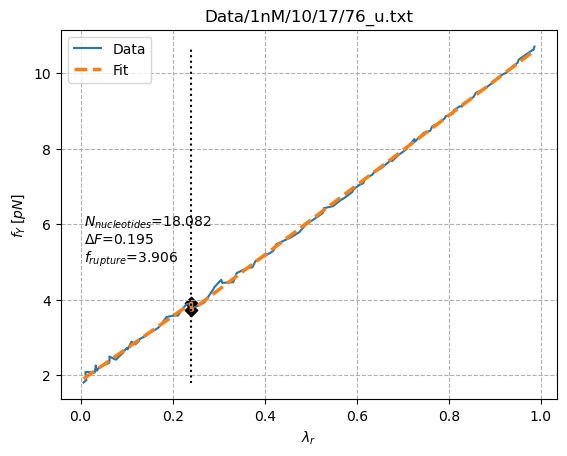

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,3.906485,3.71155,5.312278,18.082179,0.04562,0.02783,0.240758,8.558963,1.845847,9.241829,1.486507,2


In [11]:
file = reading.readTxt(number=17, N=76, ty='u', graph=True)
reading.params_df

In [12]:
# molecules, all_molecules_f, all_molecules_u = reading.seq_analysis_post_meta()
res = np.load(f'res/{folder}/f_max{f_max}.npz', allow_pickle=True)
molecules = res['molecules']
all_molecules_u = res['all_molecules_u']
all_molecules_f = res['all_molecules_f']

In [13]:
keys = ['f_rupture', 'f_rupture_next', 'x_ssDNA', 'N', 'k_eff', 't_0', 'fileName']
# Create a dictionary with the data
data = {}
for ii, molecule in enumerate(molecules):
    U_dict = {}
    F_dict = {}
    
    for jj, el in enumerate(all_molecules_u[ii]):
        U_dict[jj+1] = dict(zip(keys, el[0]))
    
    for jj, el in enumerate(all_molecules_f[ii]):
        F_dict[jj+1] = dict(zip(keys, el[0]))
    
    data[molecule] = {'U': U_dict, 'F': F_dict}

In [14]:
data[molecules[-1]]['U']#['N']

{1: {'f_rupture': 3.6762878059768935,
  'f_rupture_next': 3.235885211057798,
  'x_ssDNA': 16.04313135797907,
  'N': 56.29714326132042,
  'k_eff': 0.029270102573256504,
  't_0': 6.628660000000309,
  'fileName': 'Data/1nM/10/17/3_u.txt'},
 2: {'f_rupture': 4.536824577410331,
  'f_rupture_next': 3.6250487649287675,
  'x_ssDNA': 21.64110961550079,
  'N': 68.71176334684485,
  'k_eff': 0.04448103716112103,
  't_0': 11.167960000000221,
  'fileName': 'Data/1nM/10/17/4_u.txt'},
 3: {'f_rupture': 5.553183529650872,
  'f_rupture_next': 4.408642086334094,
  'x_ssDNA': 26.090793124434732,
  'N': 76.29402707049736,
  'k_eff': 0.046126975817377784,
  't_0': 19.95019000000002,
  'fileName': 'Data/1nM/10/17/6_u.txt'},
 4: {'f_rupture': 5.514492420490665,
  'f_rupture_next': 4.134462422756579,
  'x_ssDNA': 26.116675020972266,
  'N': 76.57114317369631,
  'k_eff': 0.055549557848943075,
  't_0': 24.309079999999994,
  'fileName': 'Data/1nM/10/17/7_u.txt'},
 5: {'f_rupture': 4.957156114287955,
  'f_rupture_n

In [15]:
metaFile = np.loadtxt(f'meta/1nM/{f_max}/jumps.txt', dtype=str)

In [16]:
N_U = {
    molecule: {
        key: value['N'] for key, value in data[molecule]['U'].items() if value['fileName'] in metaFile
        } 
    for molecule in molecules}
N_F = {
    molecule: {
        key: value['N'] for key, value in data[molecule]['F'].items() if value['fileName'] in metaFile
        } 
    for molecule in molecules}

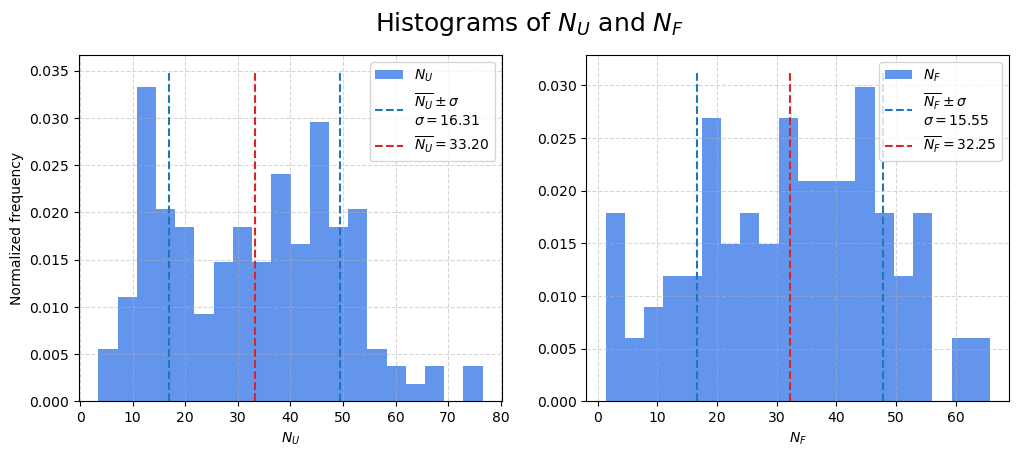

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot = [
    np.array([value['N'] for molecule in molecules for _, value in data[molecule]['U'].items() if value['fileName'] in metaFile]), 
    np.array([value['N'] for molecule in molecules for _, value in data[molecule]['F'].items() if value['fileName'] in metaFile])
]
labels = ['N_U', 'N_F']
for ii in range(2):
    ax[ii].hist(to_plot[ii], bins=20, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0])+np.std(to_plot[ii][to_plot[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot[ii][to_plot[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0])-np.std(to_plot[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot[ii][to_plot[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $N_U$ and $N_F$', fontsize=18)
plt.show()

In [18]:
# Compute the percentage of elements outside the [mean-std, mean+std] confidence interval
failed_U = np.sum((to_plot[0] < np.mean(to_plot[0])-np.std(to_plot[0])) | (to_plot[0] > np.mean(to_plot[0])+np.std(to_plot[0])))/len(to_plot[0]) * 100
failed_F = np.sum((to_plot[1] < np.mean(to_plot[1])-np.std(to_plot[1])) | (to_plot[1] > np.mean(to_plot[1])+np.std(to_plot[1])))/len(to_plot[1]) * 100
print(f'Outliers in U: {failed_U:.2f}%\nOutliers in F: {failed_F:.2f}%')

Outliers in U: 42.57%
Outliers in F: 32.69%


In [19]:
# See an example of the failed_U trajectory
failed_U_dict = {}
failed_F_dict = {}

for mol, sub_dic in data.items():
    failed = []
    for key, values in sub_dic['U'].items():
        if (values['N'] < np.mean(
            to_plot[0])-np.std(to_plot[0]) or values['N'] > np.mean(
                to_plot[0])+np.std(to_plot[0])) and values['fileName'] in metaFile: 
            failed.append(values['fileName']) 
    if failed:
        failed_U_dict[mol] = failed

for mol, sub_dic in data.items():
    failed = []
    for key, values in sub_dic['F'].items():
        if (values['N'] < np.mean(
            to_plot[1])-np.std(to_plot[1]) or values['N'] > np.mean(
                to_plot[1])+np.std(to_plot[1])) and values['fileName'] in metaFile: 
            failed.append(values['fileName']) 
    if failed:
        failed_F_dict[mol] = failed

In [20]:
number_of_failed_anaylys_U = sum([len(sub_dic) for sub_dic in failed_U_dict.values()])
number_of_failed_anaylys_F = sum([len(sub_dic) for sub_dic in failed_F_dict.values()])

In [21]:
print(f'Percentage of outliers U (looking only at the # of nucleotides): {number_of_failed_anaylys_U/len(to_plot[0]) * 100:.2f}%')
print(f'Percentage of outliers F (looking only at the # of nucleotides): {number_of_failed_anaylys_F/len(to_plot[1]) * 100:.2f}%')

Percentage of outliers U (looking only at the # of nucleotides): 42.57%
Percentage of outliers F (looking only at the # of nucleotides): 32.69%


In [22]:
mean_N_U = np.mean(to_plot[0][to_plot[0] != 0])
std_N_U = np.std(to_plot[0][to_plot[0] != 0])
mean_N_F = np.mean(to_plot[1][to_plot[1] != 0])
std_N_F = np.std(to_plot[1][to_plot[1] != 0])

# outliers_U = np.where(np.abs(N_U - mean_N_U) > std_N_U)[0]
# outliers_F = np.where(np.abs(N_F - mean_N_F) > std_N_F)[0]

outliers_U = {
    molecule: {
        value['fileName']: value['N'] for value in data[molecule]['U'].values() 
        if (value['N'] > 70 or value['N'] < 30) and value['fileName'] in metaFile
        } for molecule in molecules}
outliers_F = {
    molecule: {
        value['fileName']: value['N'] for value in data[molecule]['F'].values() 
        if (value['N'] > 70 or value['N'] < 30) and value['fileName'] in metaFile
        } for molecule in molecules}

In [23]:
path_re_analyze_U = [traj for molecule in outliers_U.keys() for traj in outliers_U[molecule].keys()]
path_re_analyze_F = [traj for molecule in outliers_F.keys() for traj in outliers_F[molecule].keys()]

In [24]:
len(path_re_analyze_U), len(path_re_analyze_F)

(64, 43)

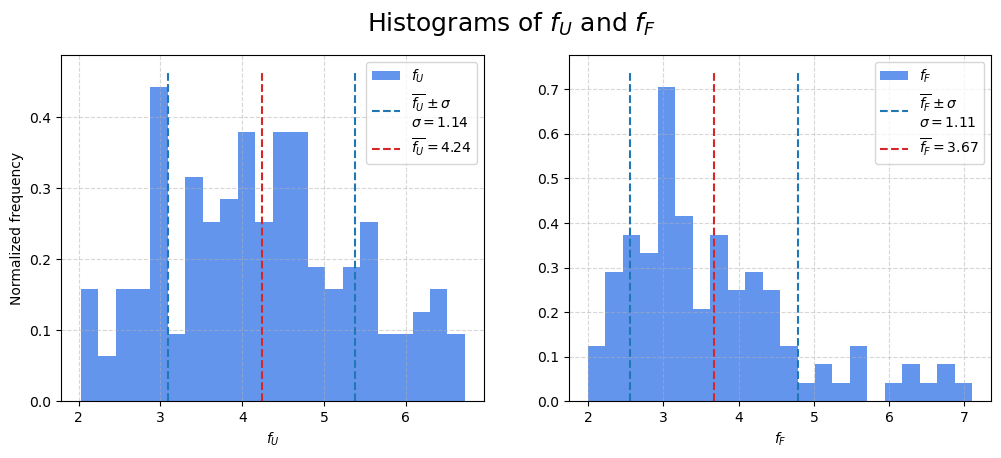

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_f_rupture = [
    np.array([value['f_rupture'] for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([value['f_rupture'] for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['f_U', 'f_F']
for ii in range(2):
    ax[ii].hist(to_plot_f_rupture[ii], bins=22, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0])+np.std(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0])-np.std(to_plot_f_rupture[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $f_U$ and $f_F$', fontsize=18)
plt.show()

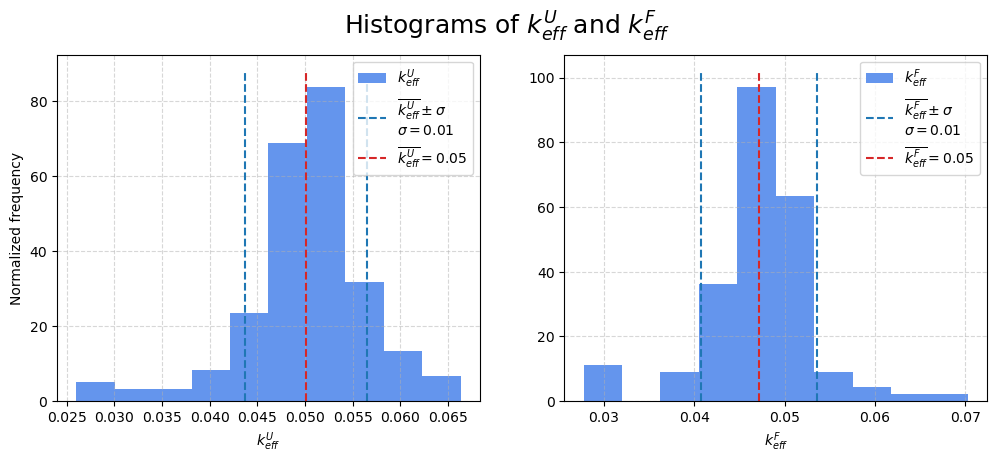

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_k_eff = [
    np.array([value['k_eff'] for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([value['k_eff'] for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['k_{eff}^U', 'k_{eff}^F']
for ii in range(2):
    ax[ii].hist(to_plot_k_eff[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0])+np.std(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0])-np.std(to_plot_k_eff[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $k_{eff}^U$ and $k_{eff}^F$', fontsize=18)
plt.show()

In [27]:
from sklearn.cluster import KMeans

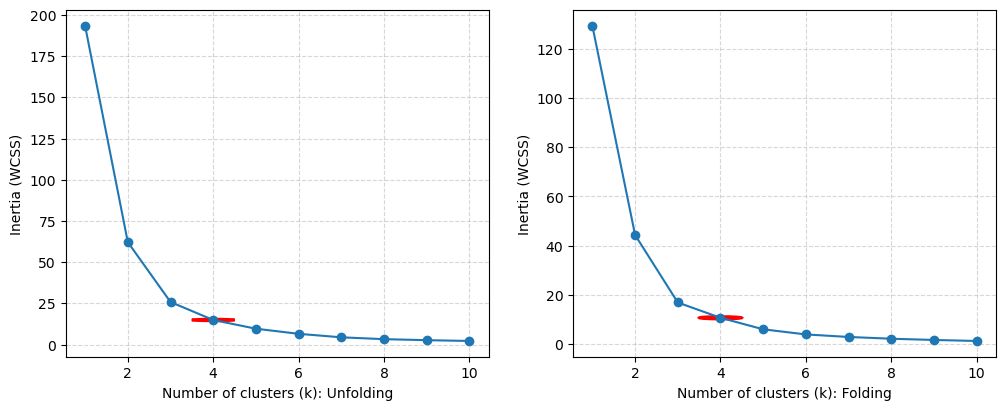

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
lab = ['Unfolding', 'Folding']
for ii in range(2):
    inertia = []
    k_values = range(1, 11)
    X = np.concatenate((to_plot_f_rupture[ii].reshape(-1, 1),
                        to_plot_k_eff[ii].reshape(-1, 1)), axis=1)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        inertia.append(kmeans.inertia_)
    ax[ii].plot(k_values, inertia, marker='o')
    ax[ii].set_xlabel(f'Number of clusters (k): {lab[ii]}')
    ax[ii].set_ylabel('Inertia (WCSS)')
    ax[ii].grid(ls='--', alpha=0.5)
    elbow_k = 4
    elbow_inertia = inertia[elbow_k-1]
    circle = plt.Circle((elbow_k, elbow_inertia), radius=0.5, 
                        color='red', fill=False, linewidth=2)
    ax[ii].add_patch(circle)

plt.show()

In [29]:
kmeans = KMeans(n_clusters=elbow_k, random_state=42)

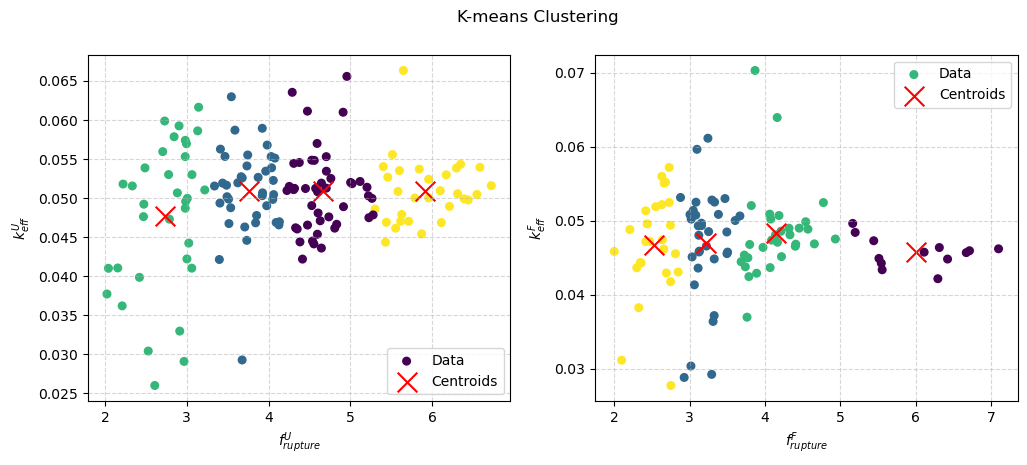

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
lab = ['U', 'F']
for ii in range(2):
    X = np.concatenate((to_plot_f_rupture[ii].reshape(-1, 1), 
                        to_plot_k_eff[ii].reshape(-1, 1)), axis=1)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    ax[ii].scatter(X[:, 0], X[:, 1], s=30, c=labels, 
                cmap='viridis', label='Data')
    ax[ii].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
    ax[ii].set_xlabel('$f_{rupture}^{'+lab[ii]+'}$')
    ax[ii].set_ylabel("$k_{eff}^{"+lab[ii]+'}$')
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle("K-means Clustering")
plt.show()

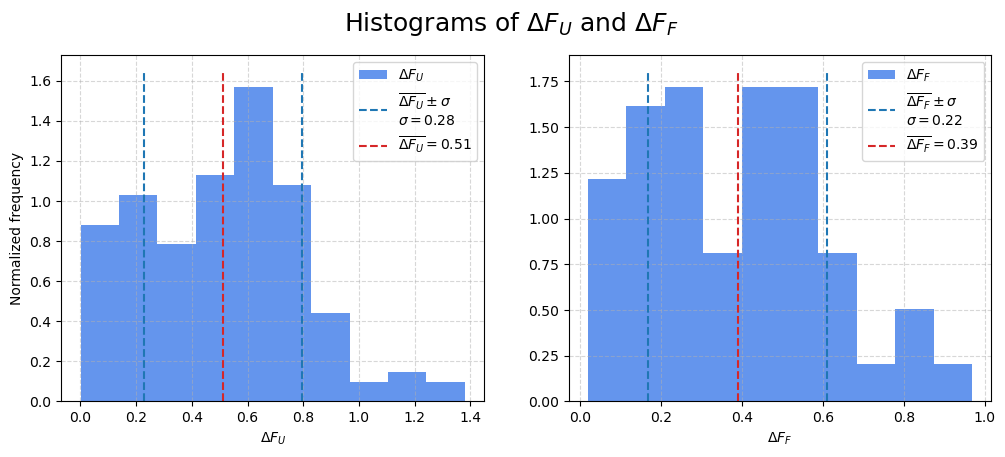

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_deltaF = [
    np.array([abs(value['f_rupture_next'] - value['f_rupture']) for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([abs(value['f_rupture_next'] - value['f_rupture']) for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['\Delta F_{U}', '\Delta F_{F}']
for ii in range(2):
    ax[ii].hist(to_plot_deltaF[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0])+np.std(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0])-np.std(to_plot_deltaF[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $\Delta F_{U}$ and $\Delta F_{F}$', fontsize=18)
plt.show()

In [48]:
fileNumb = -1

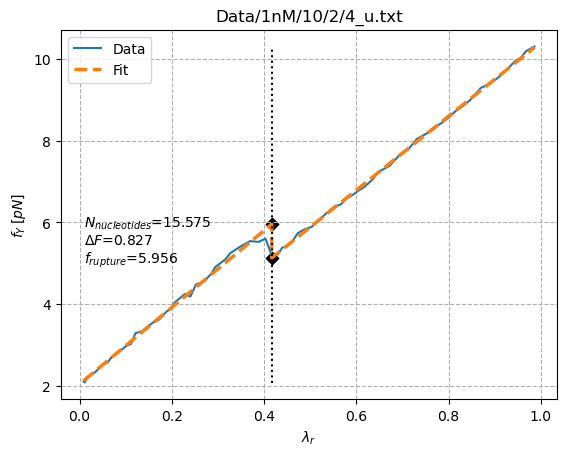

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.956334        5.129745  17.099729      15.575469  0.03793  0.416383   

      a_pre     b_pre    a_post    b_post  N_fits  
0  9.410275  2.038058  9.056808  1.358646       2  


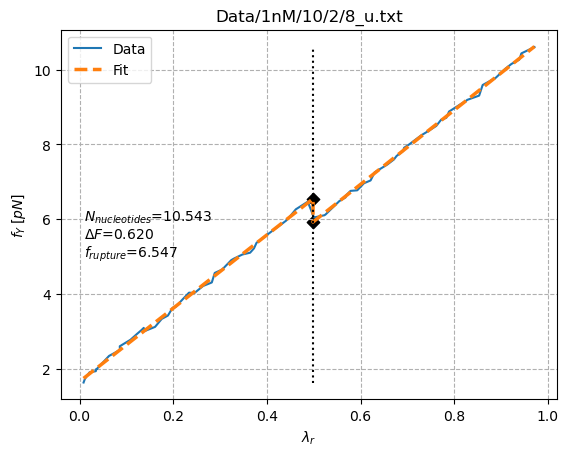

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.546594        5.926103  13.679257      10.543358  0.04058  0.498552   

     a_pre    b_pre    a_post    b_post  N_fits  
0  9.80363  1.65898  9.925909  0.977526       2  


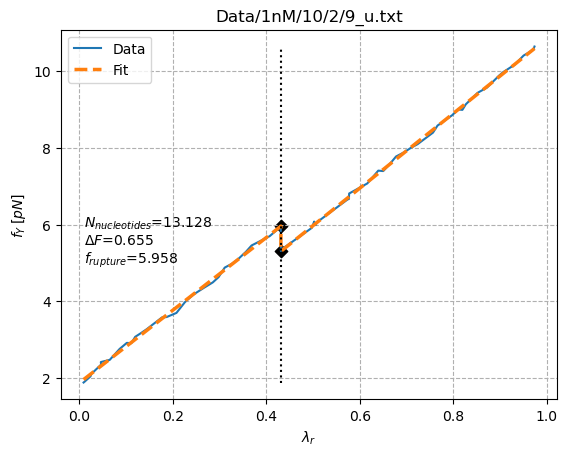

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     t_0       λ_0  \
0   5.957615         5.30262  14.423089      13.127674  0.0308  0.431038   

      a_pre     b_pre    a_post    b_post  N_fits  
0  9.481297  1.870816  9.753858  1.098337       2  


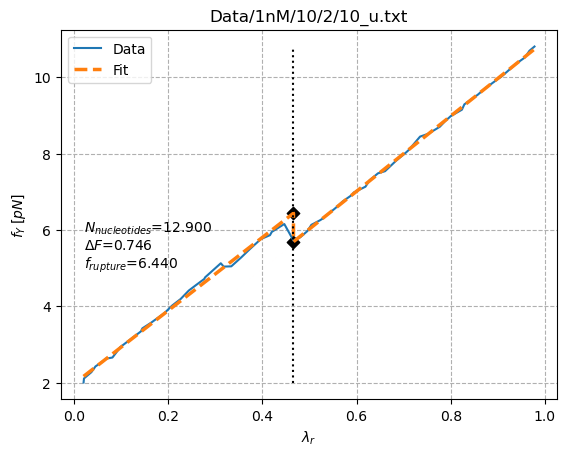

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0    6.43968        5.693533  16.371746      12.900159  0.03165  0.466008   

      a_pre     b_pre    a_post    b_post  N_fits  
0  9.585383  1.972818  9.853761  1.101604       2  


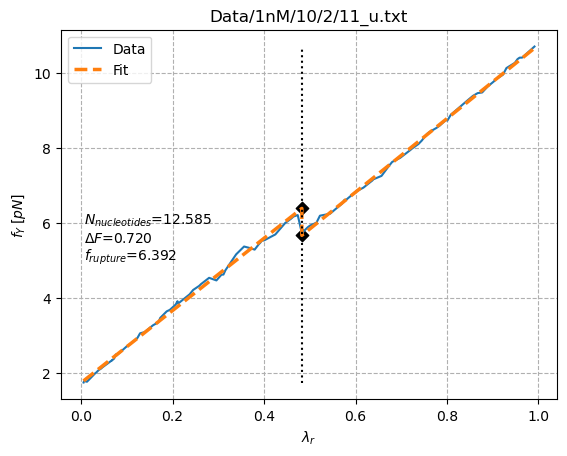

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.391665        5.671275  15.80629      12.585487  0.05185  0.482583   

      a_pre     b_pre    a_post    b_post  N_fits  
0  9.654394  1.732619  9.829598  0.927678       2  


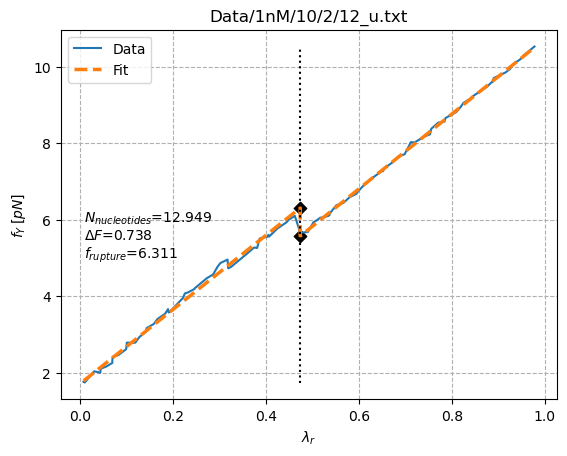

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.311008        5.572766  15.964167      12.948652  0.05225  0.473366   

      a_pre     b_pre    a_post    b_post  N_fits  
0  9.697156  1.720702  9.778913  0.943758       2  


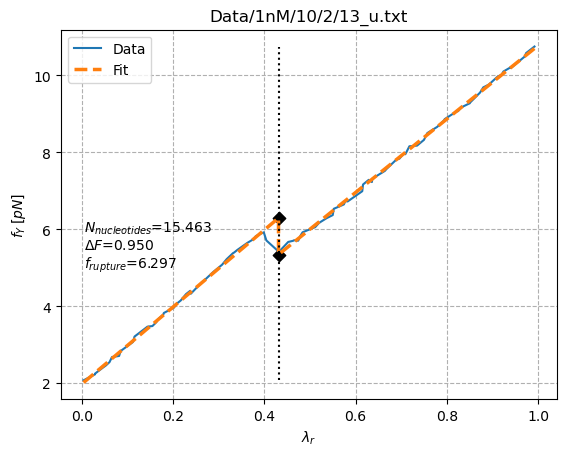

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.297199        5.347578  19.000727      15.462694  0.03946  0.431024   

       a_pre    b_pre    a_post   b_post  N_fits  
0  10.009149  1.98302  9.546108  1.23298       2  


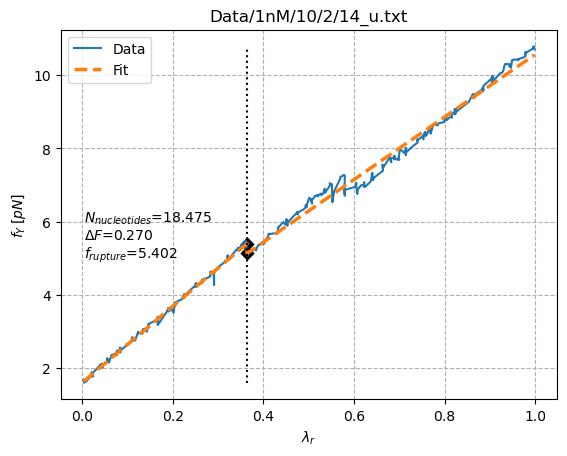

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.401868        5.132255  6.252124      18.475171  0.16559  0.363986   

       a_pre     b_pre    a_post    b_post  N_fits  
0  10.437095  1.602907  8.550144  2.020119       2  


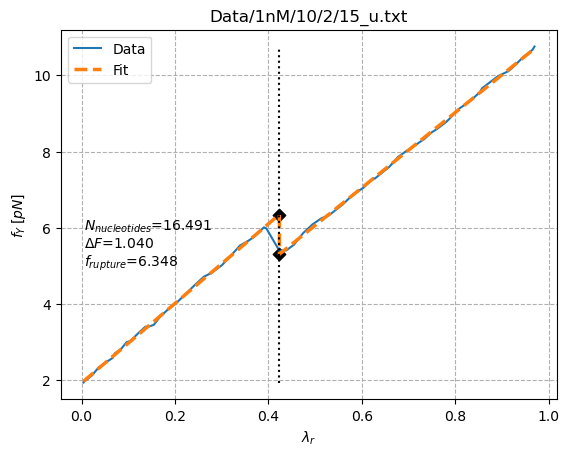

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.347521        5.307943  20.505766      16.490928  0.02829  0.423688   

       a_pre     b_pre    a_post    b_post  N_fits  
0  10.423426  1.931236  9.866573  1.127591       2  


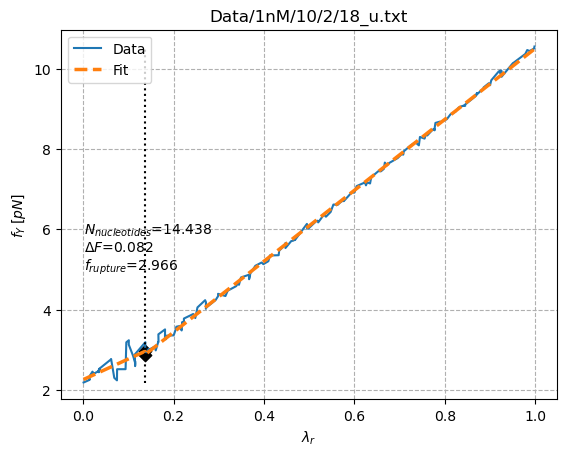

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.966001        2.884402  3.656064      14.437548  0.03208  0.136679   

     a_pre     b_pre    a_post    b_post  N_fits  
0  5.14799  2.262377  8.818973  1.679031       2  


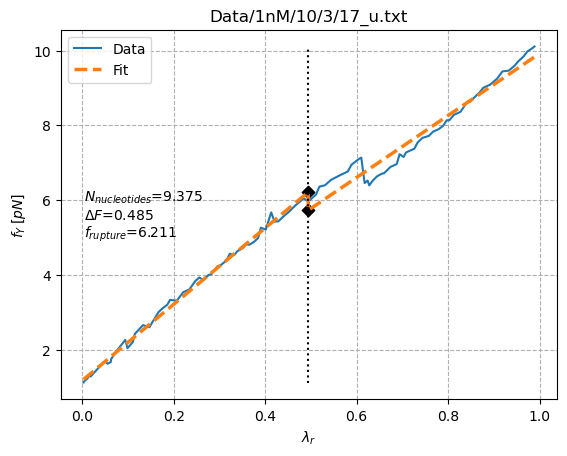

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.211069        5.725607  11.272181       9.375265  0.05469  0.494029   

     a_pre     b_pre    a_post    b_post  N_fits  
0  10.1992  1.172368  8.290209  1.630003       2  


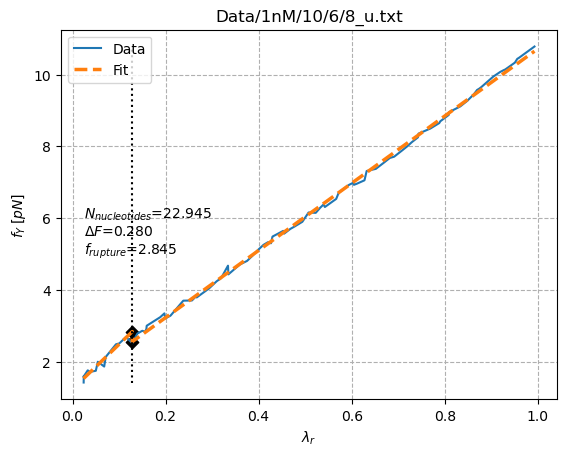

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     t_0       λ_0  \
0   2.844633        2.564468  5.667805      22.945239  0.0144  0.128227   

       a_pre     b_pre    a_post    b_post  N_fits  
0  12.473077  1.245254  9.348346  1.365762       2  


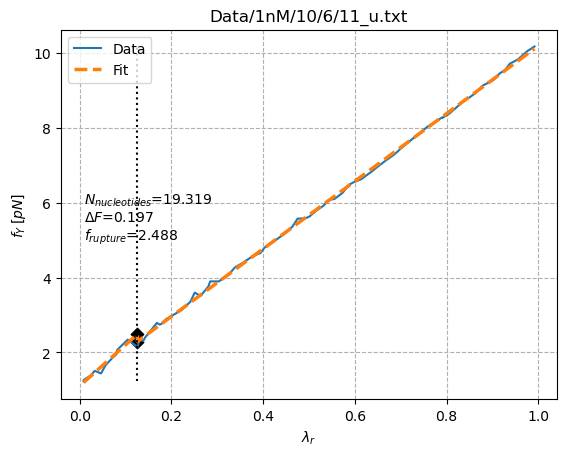

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.488161        2.291574  4.388837      19.318925  0.01001  0.125884   

       a_pre     b_pre    a_post    b_post  N_fits  
0  11.007701  1.102467  9.040032  1.153578       2  


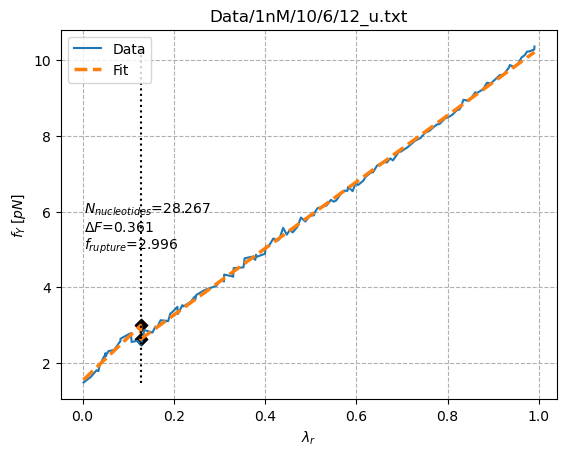

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.995519        2.634409  7.199883       28.26731  0.02173  0.127333   

       a_pre    b_pre    a_post    b_post  N_fits  
0  11.443462  1.53839  8.771999  1.517445       2  


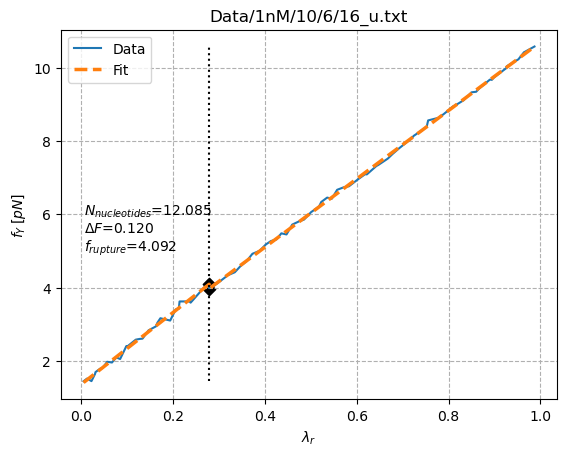

   f_rupture  f_rupture_next  x_ssDNA  N_nucleotides      t_0       λ_0  \
0   4.092464        3.972541  3.63096      12.084807  0.03002  0.278344   

      a_pre     b_pre    a_post    b_post  N_fits  
0  9.796787  1.365583  9.315858  1.379524       2  


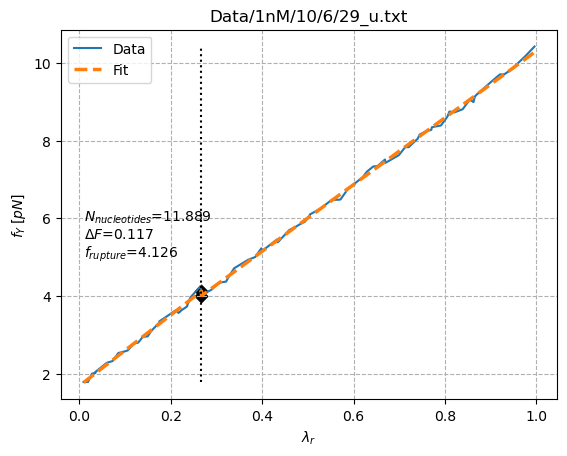

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides    t_0       λ_0  \
0    4.12599        4.009233  3.585814      11.888546  0.026  0.267181   

     a_pre     b_pre    a_post    b_post  N_fits  
0  9.10526  1.693234  8.596408  1.712432       2  


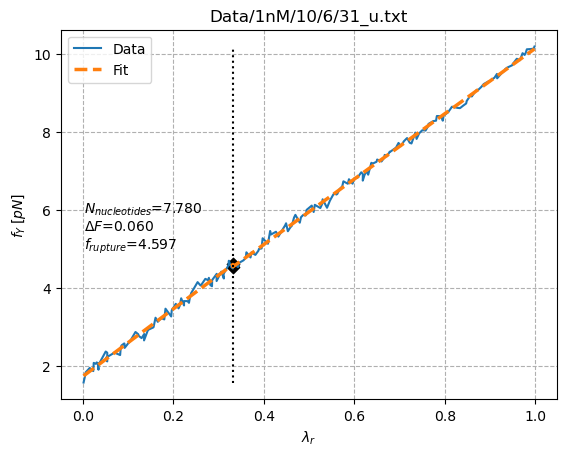

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   4.596577        4.537051  2.464499       7.780246  0.07739  0.331525   

      a_pre     b_pre    a_post    b_post  N_fits  
0  8.643785  1.730946  8.373222  1.761119       2  


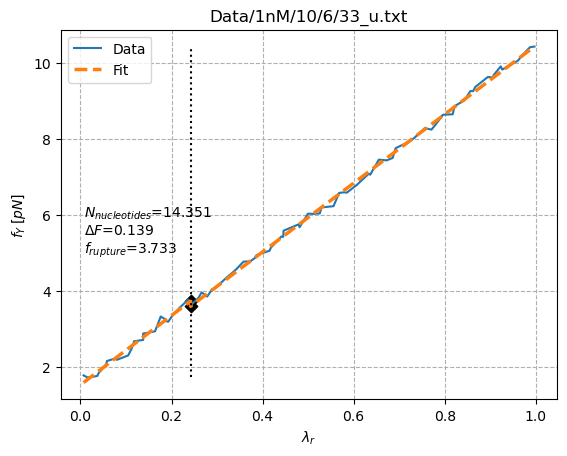

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides    t_0       λ_0  \
0   3.733352        3.594544  4.121834      14.350928  0.026  0.241829   

      a_pre     b_pre    a_post   b_post  N_fits  
0  9.140929  1.522808  9.063933  1.40262       2  


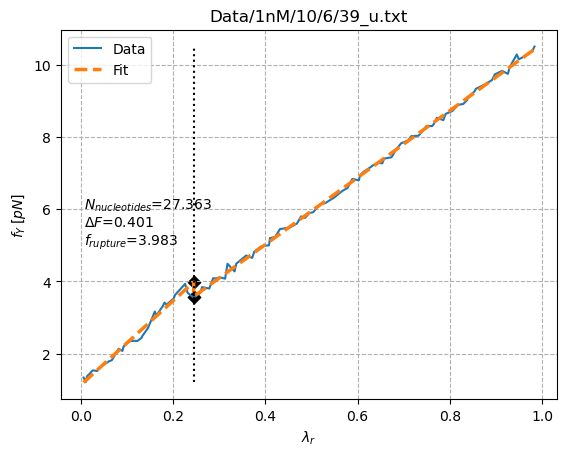

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   3.982853        3.581982  8.115161       27.36328  0.03272  0.244625   

       a_pre     b_pre    a_post   b_post  N_fits  
0  11.651652  1.132571  9.269186  1.31451       2  


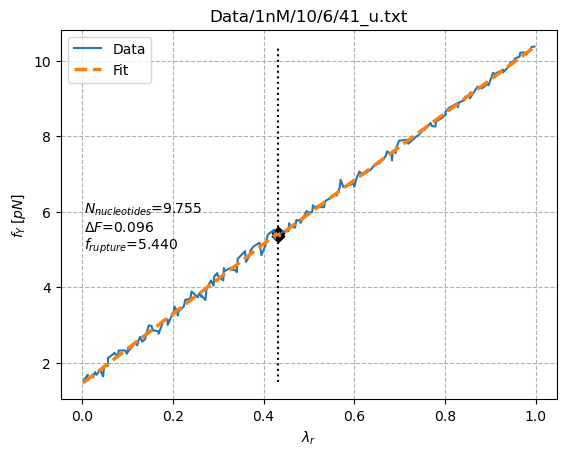

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.440076        5.344184  3.310126       9.755131  0.09448  0.432122   

      a_pre     b_pre   a_post    b_post  N_fits  
0  9.242299  1.446273  8.87836  1.507647       2  


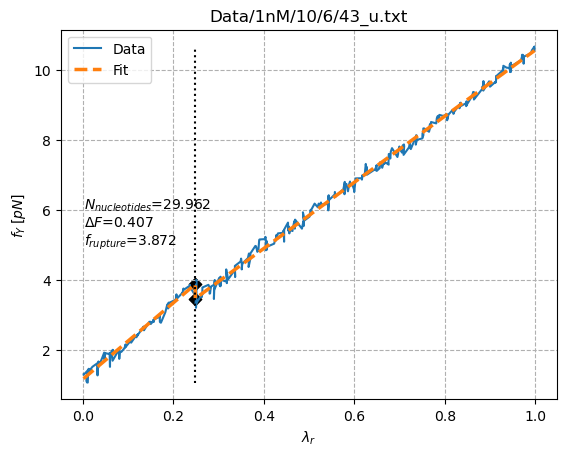

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   3.872046        3.465144  8.764236      29.962467  0.11939  0.248287   

       a_pre     b_pre    a_post    b_post  N_fits  
0  10.918844  1.161035  9.456345  1.117253       2  


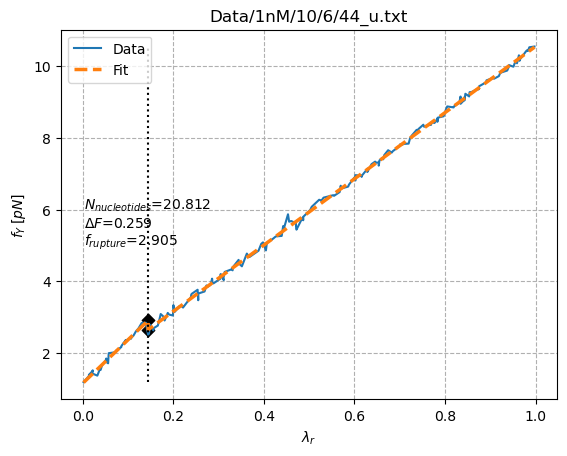

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.904978        2.646266  5.205941      20.812237  0.03736  0.144205   

       a_pre     b_pre    a_post    b_post  N_fits  
0  12.146185  1.153441  9.243513  1.313307       2  


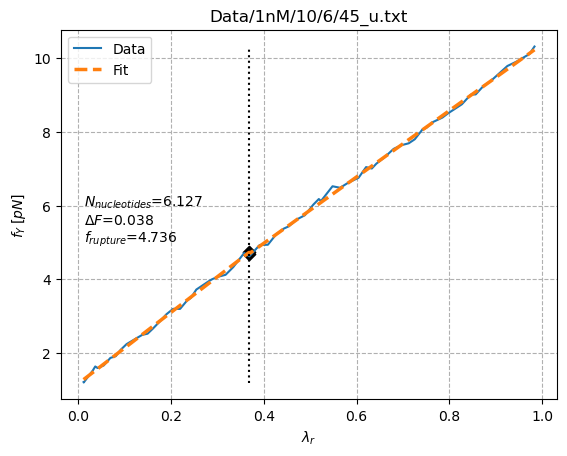

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   4.736467        4.698712  1.966107       6.127259  0.02673  0.369136   

      a_pre     b_pre    a_post    b_post  N_fits  
0  9.670882  1.166594  8.997288  1.377487       2  


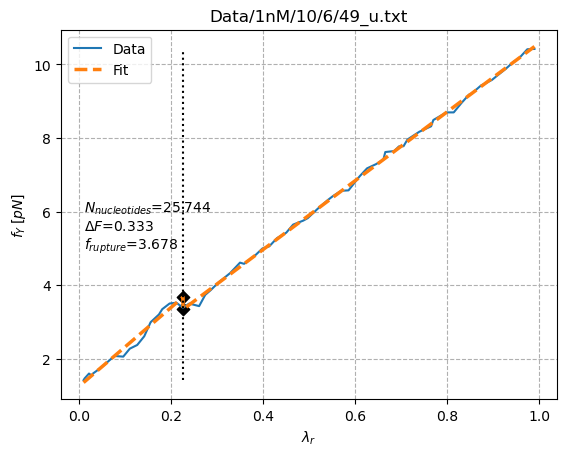

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0     3.6776        3.344352  7.337697      25.744097  0.01746  0.226399   

      a_pre     b_pre    a_post    b_post  N_fits  
0  10.72862  1.248648  9.354375  1.226528       2  


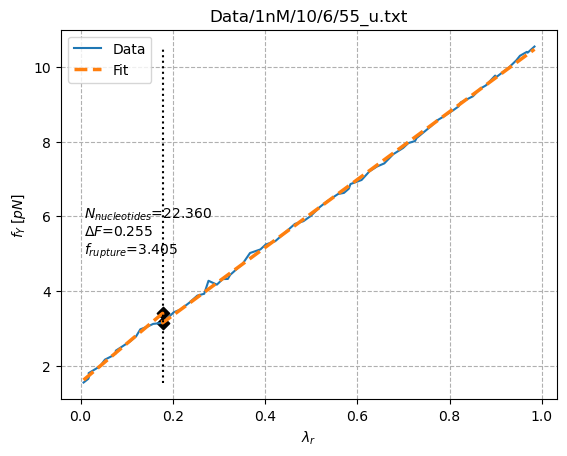

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   3.404965        3.149565  6.120357      22.360233  0.01392  0.177869   

       a_pre     b_pre   a_post    b_post  N_fits  
0  10.412758  1.552854  9.08261  1.534046       2  


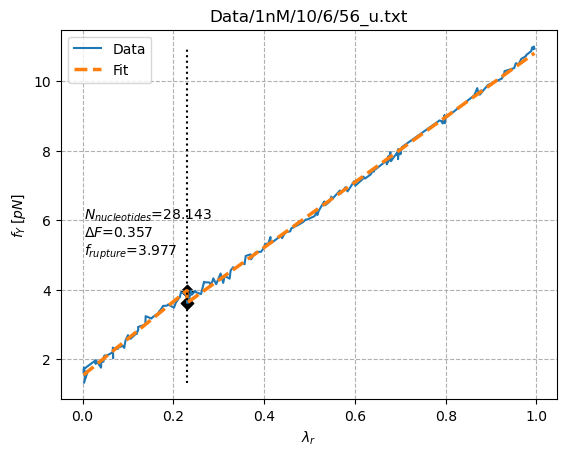

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   3.976736        3.619584  8.340323      28.143444  0.06311  0.229725   

       a_pre    b_pre    a_post    b_post  N_fits  
0  10.666167  1.52645  9.386125  1.463356       2  


In [49]:
for ii, element in enumerate(path_re_analyze_U):
    if ii <= fileNumb:
        continue
    number, N = element.split('/')[-2:]
    N, _ = N.split('_') 
    file = reading.readTxt(number=int(number), N=int(N), 
                           ty='u', forced_reshaped=0, 
                           graph=True)
    print(reading.params_df)
    
    avanti = input("Next: ")
    if avanti == "":
        continue
    else:
        fileNumb = ii
        break

In [18]:
# Create folder for images
images_path = f'imgs/{folder}/{f_max}'
isExist = os.path.exists(images_path)
if not isExist:
    os.makedirs(images_path)
    print("The images directory is created...")

The images directory is created...


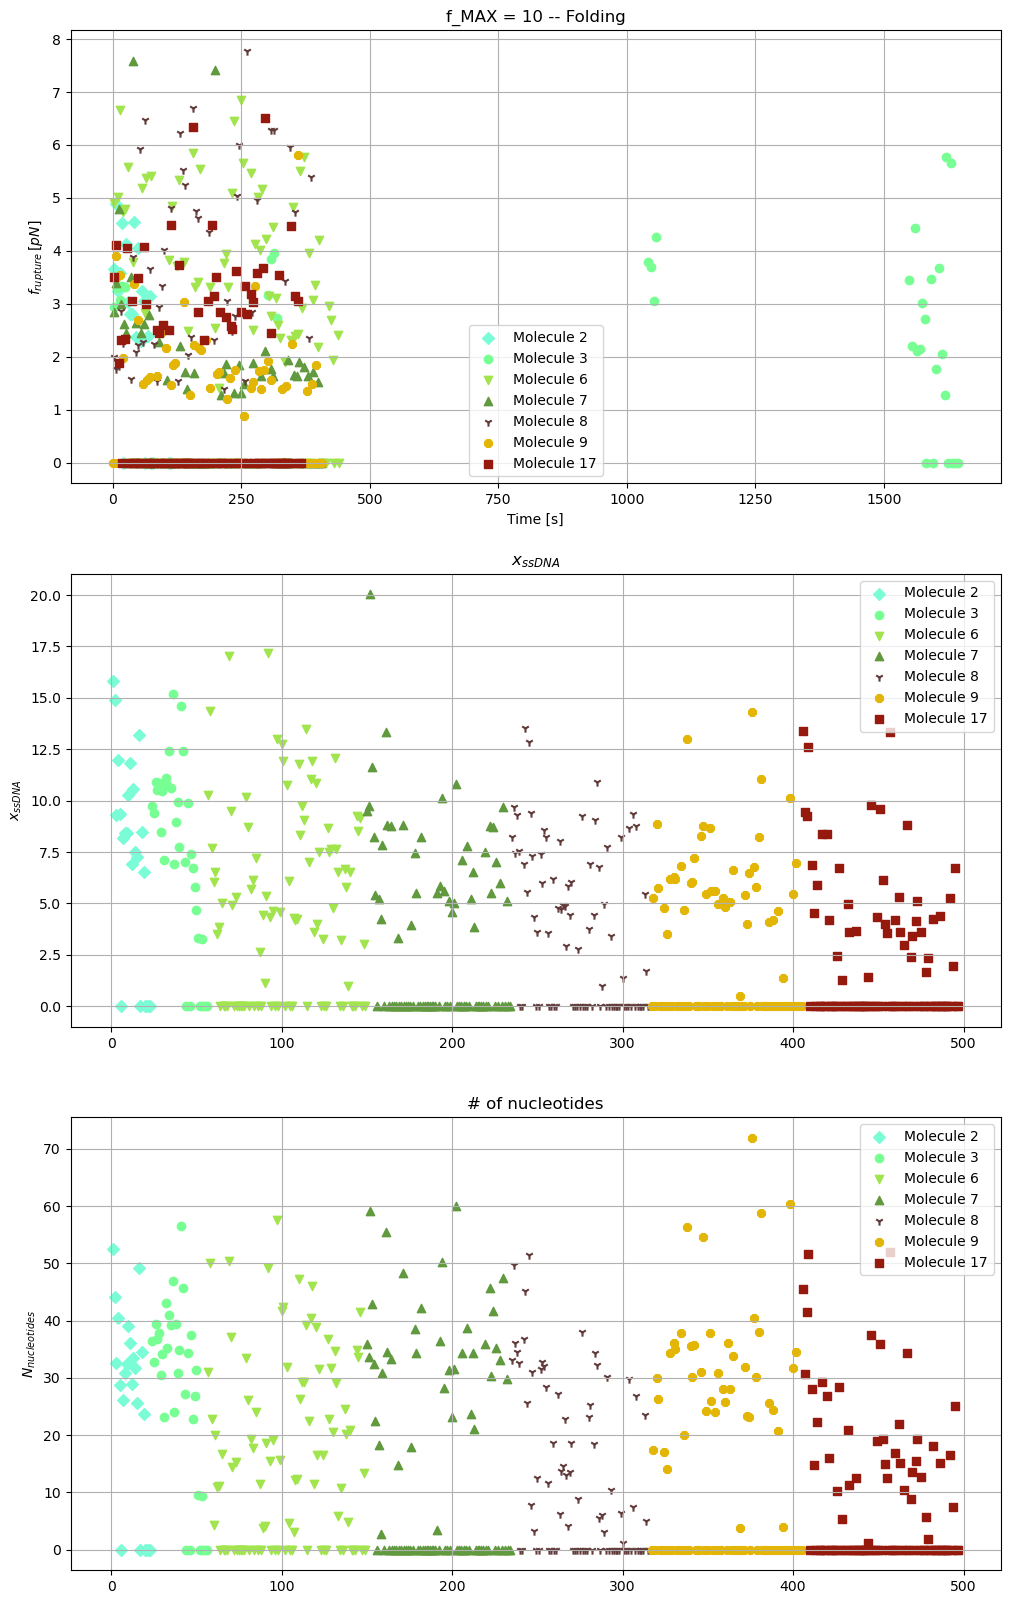

In [19]:
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_f[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Folding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding.png', dpi=300, bbox_inches='tight')
plt.show()

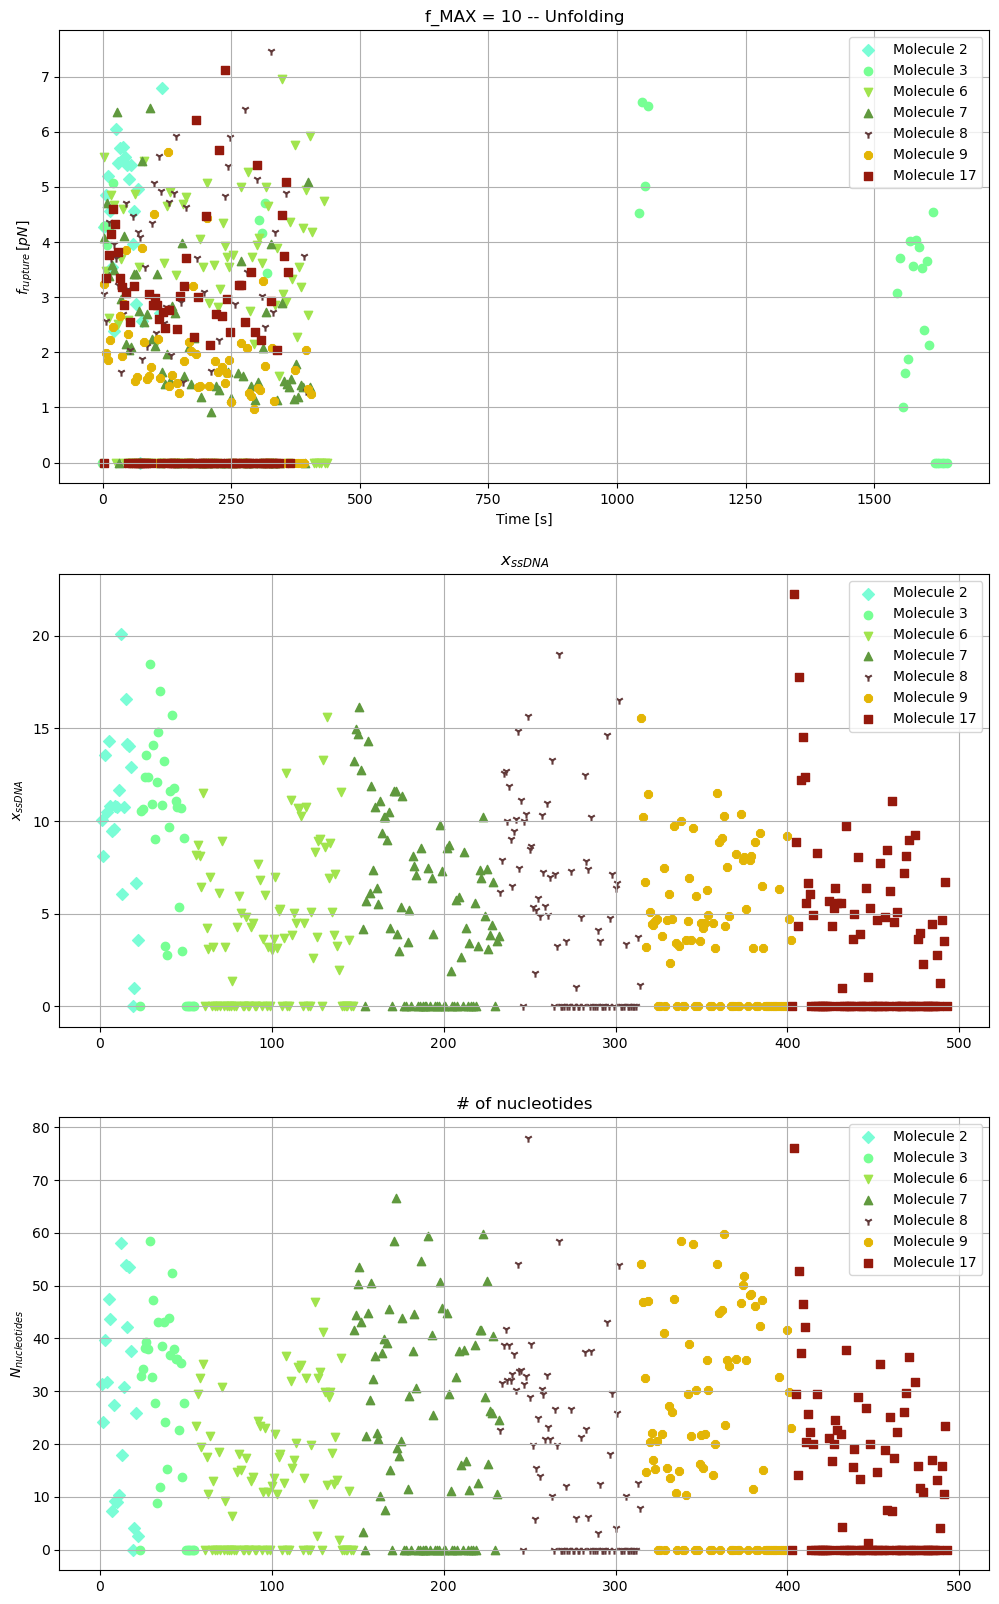

In [20]:
fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_u[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Plots per single molecule

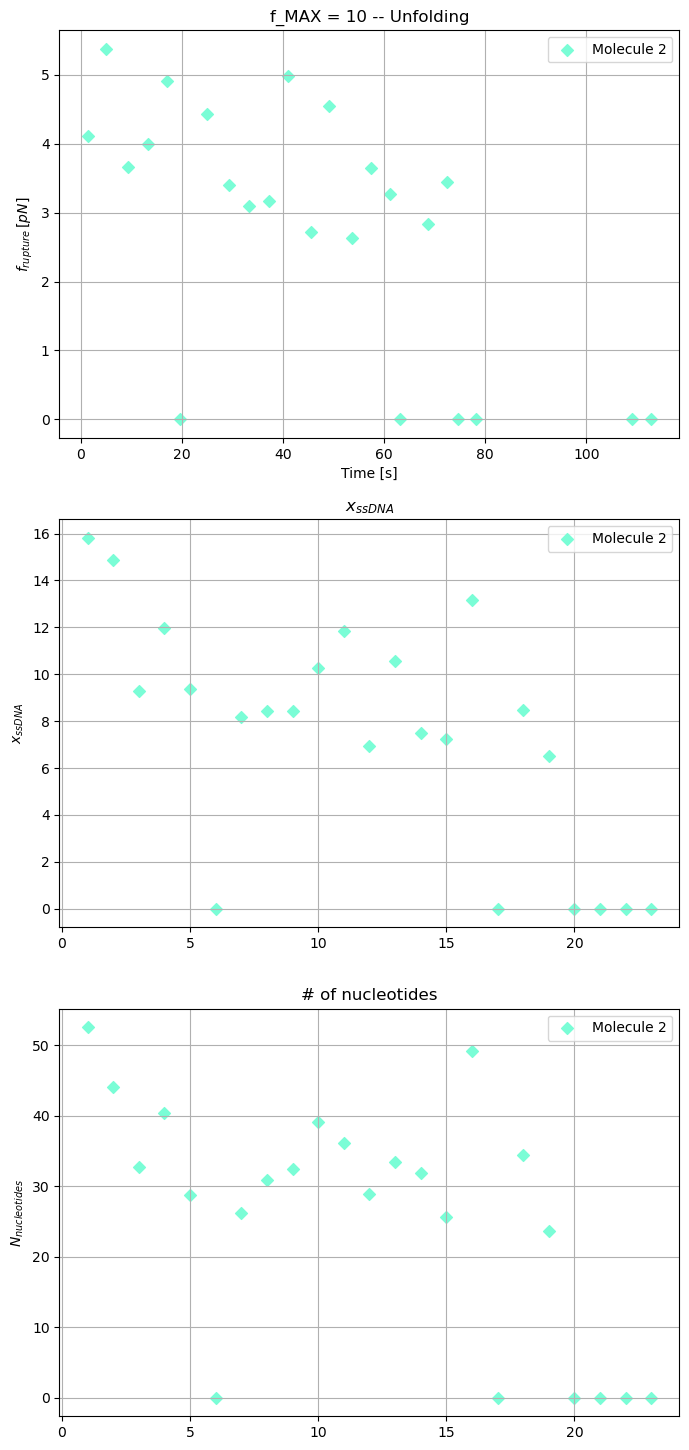

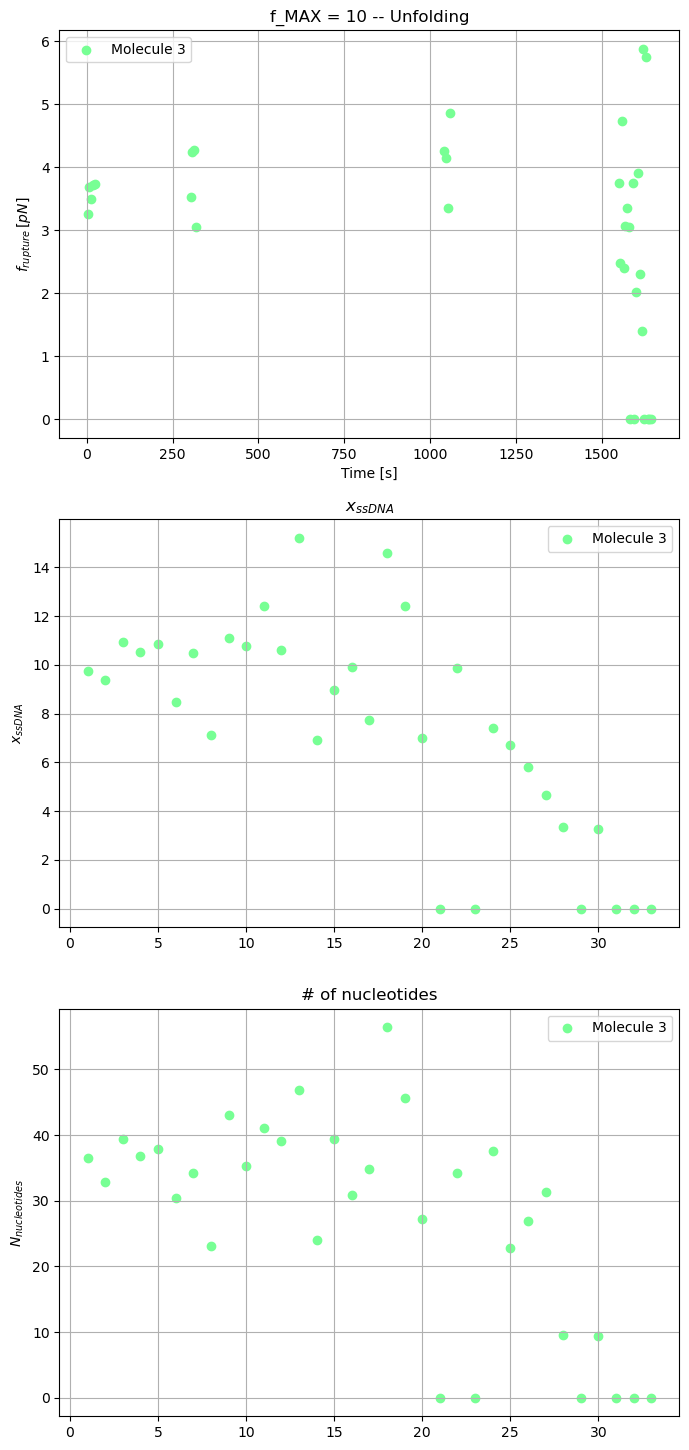

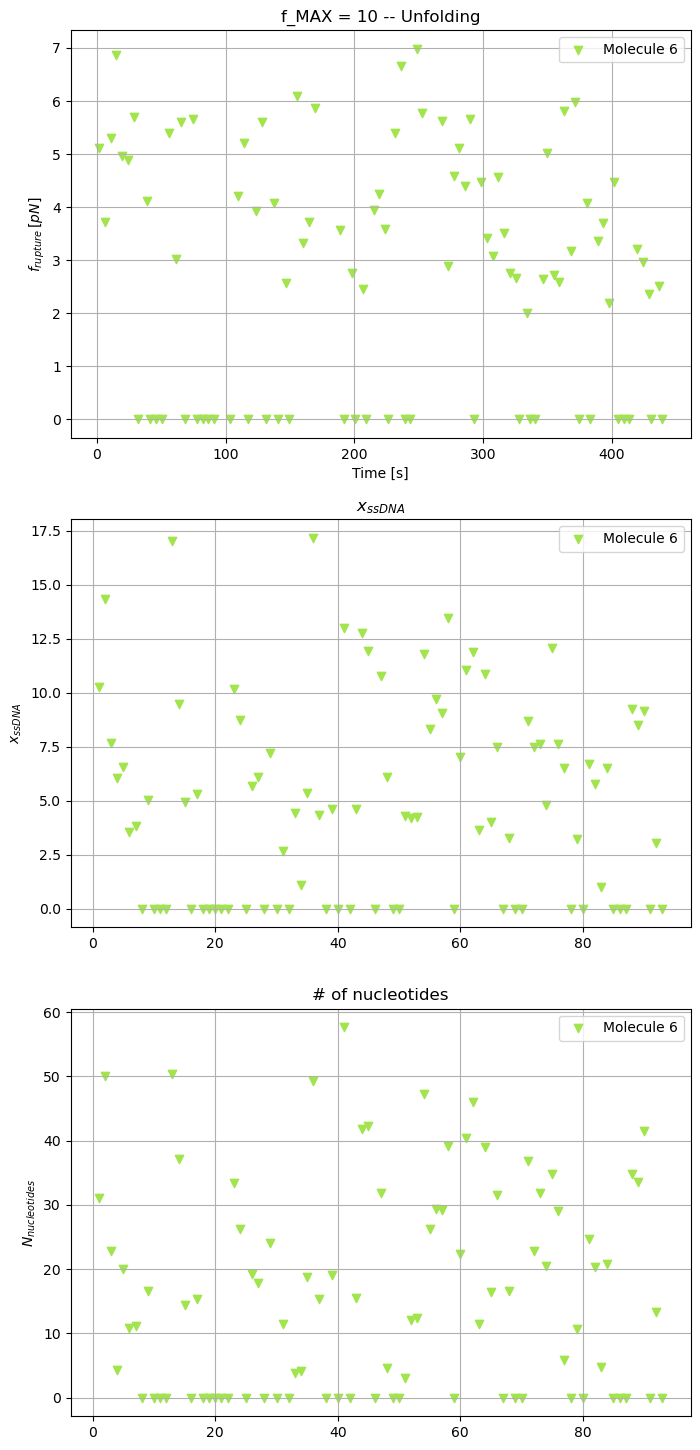

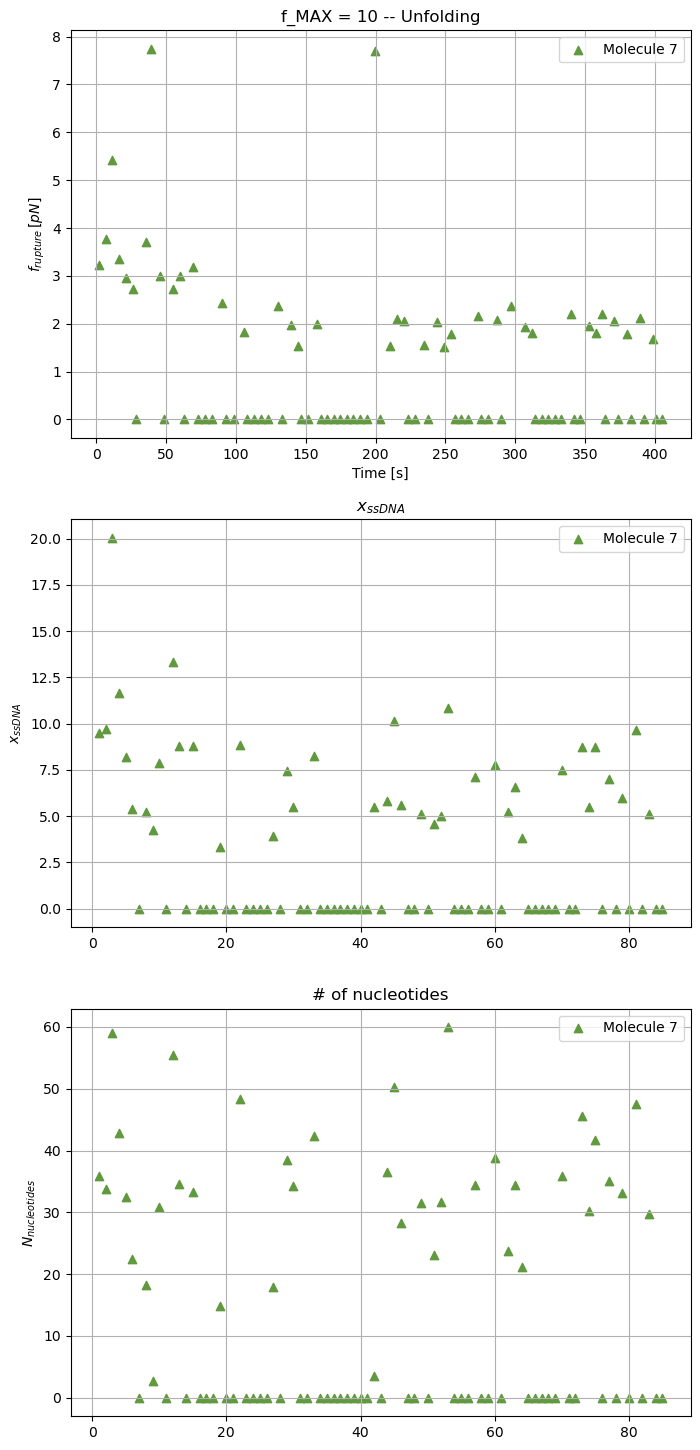

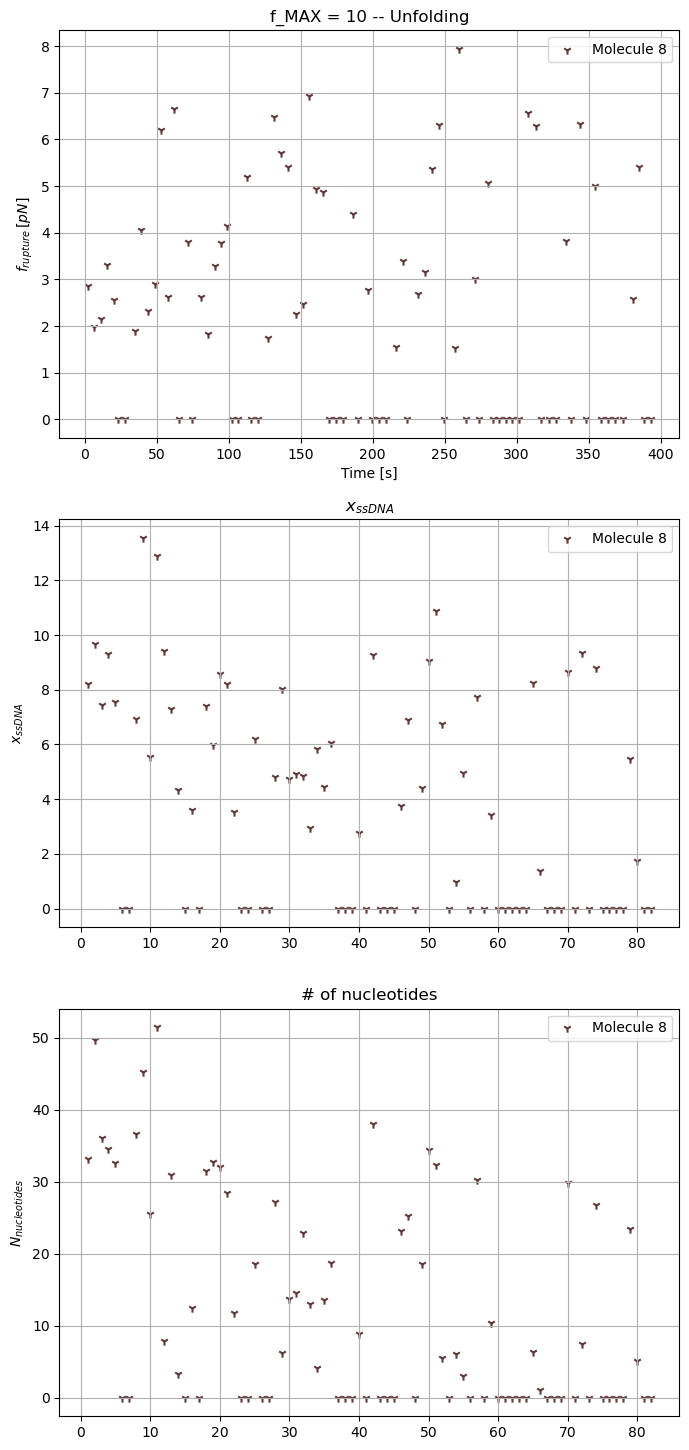

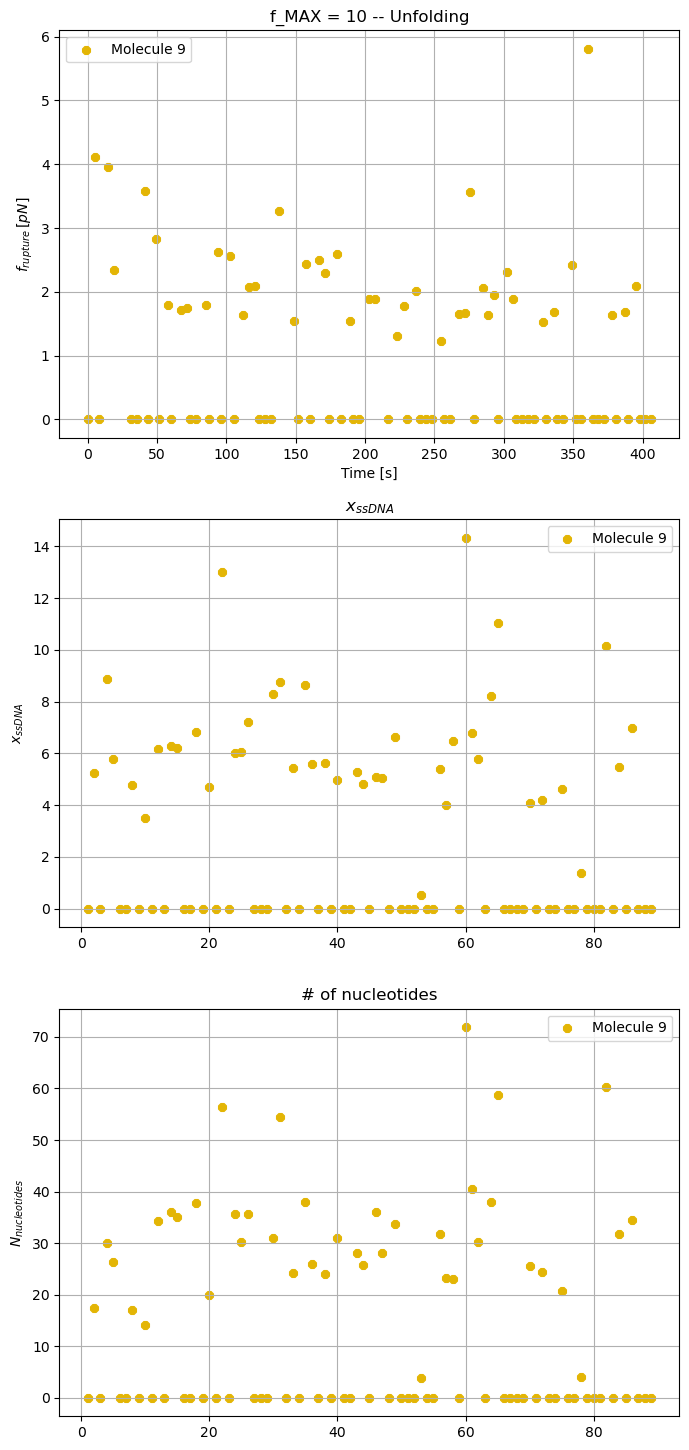

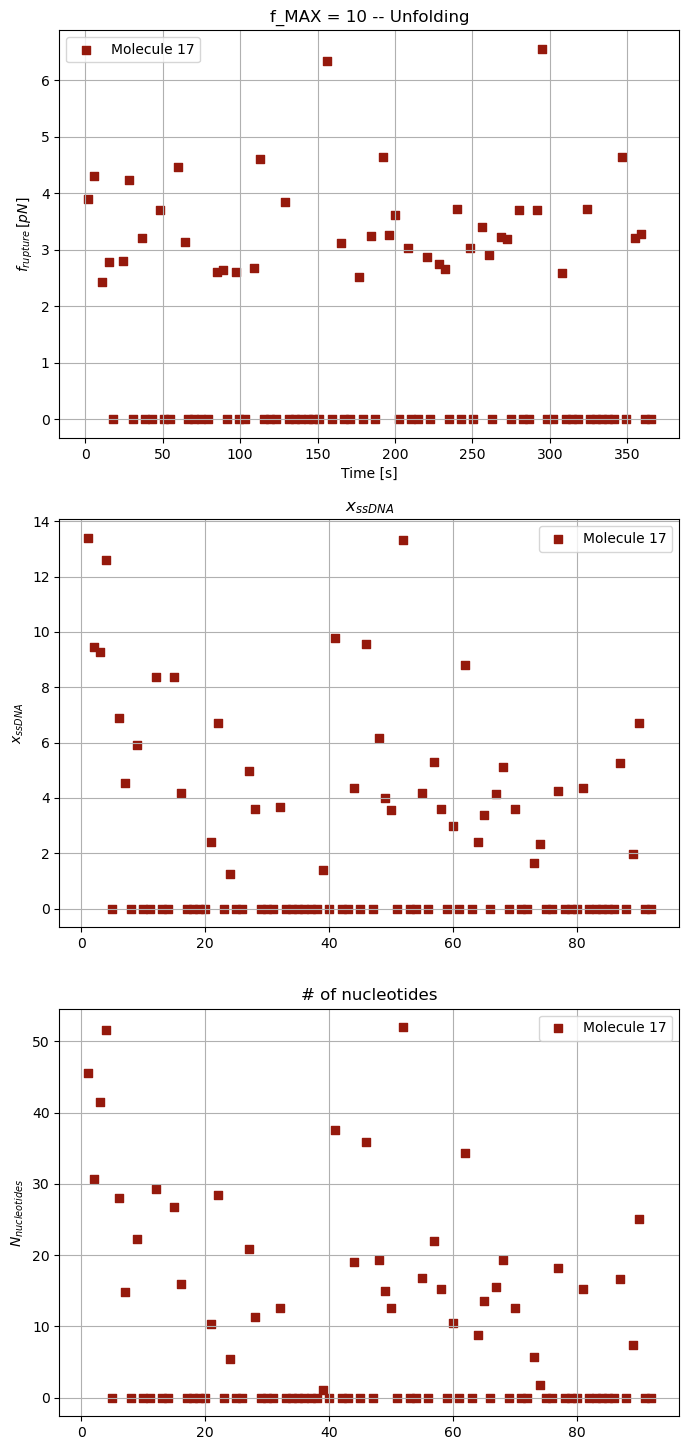

In [22]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_f[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()

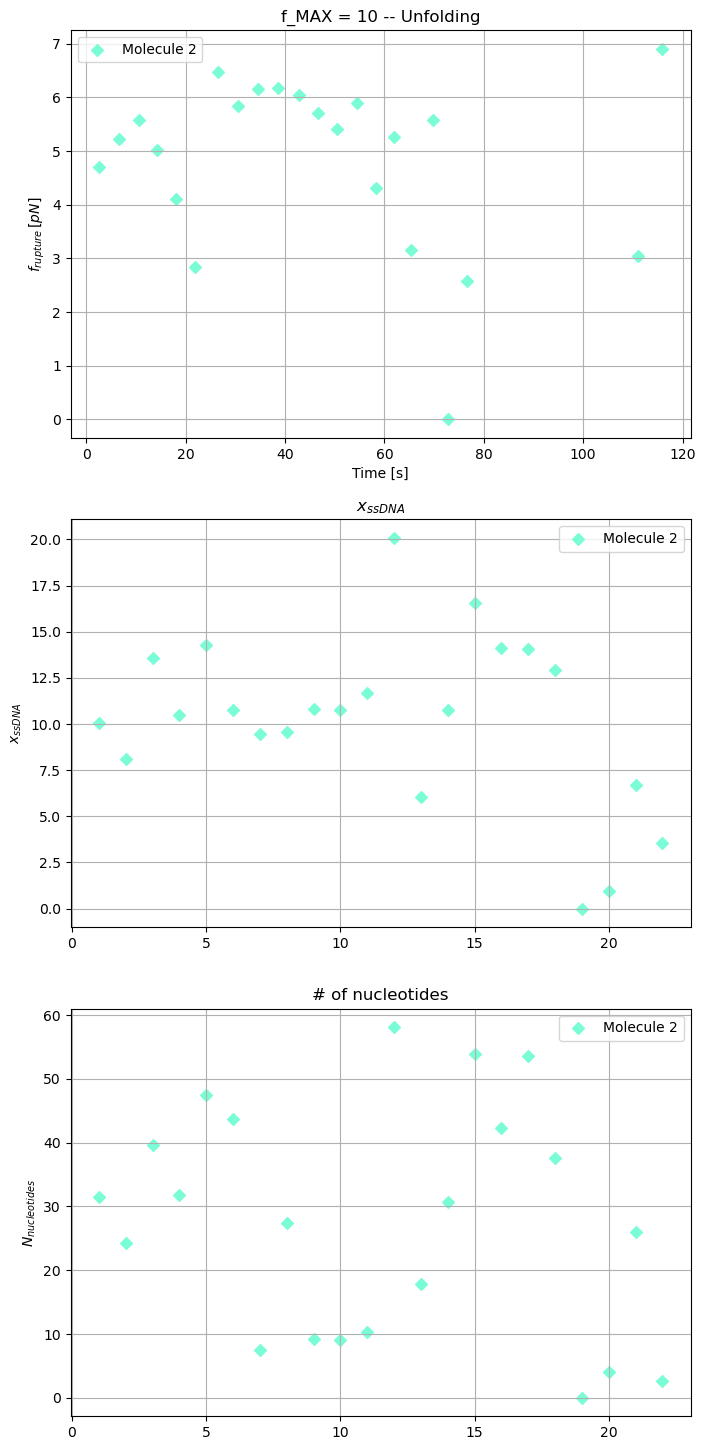

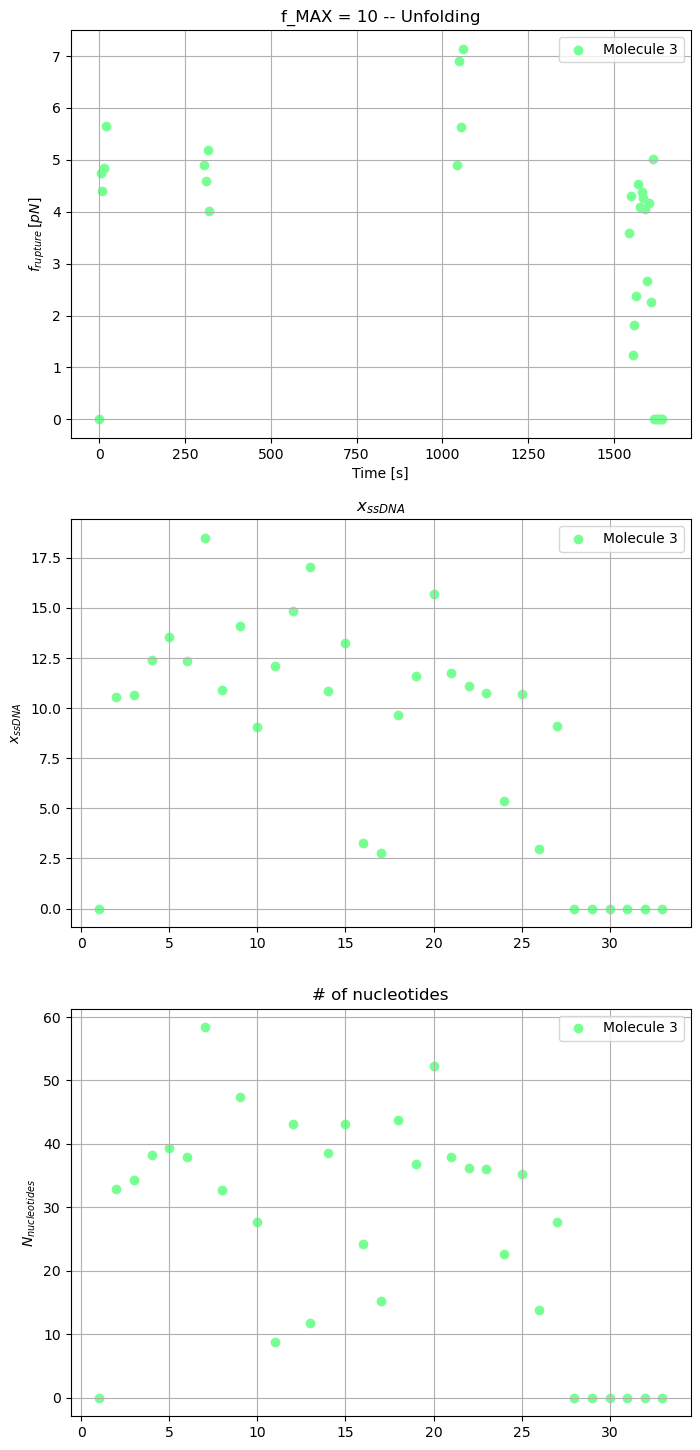

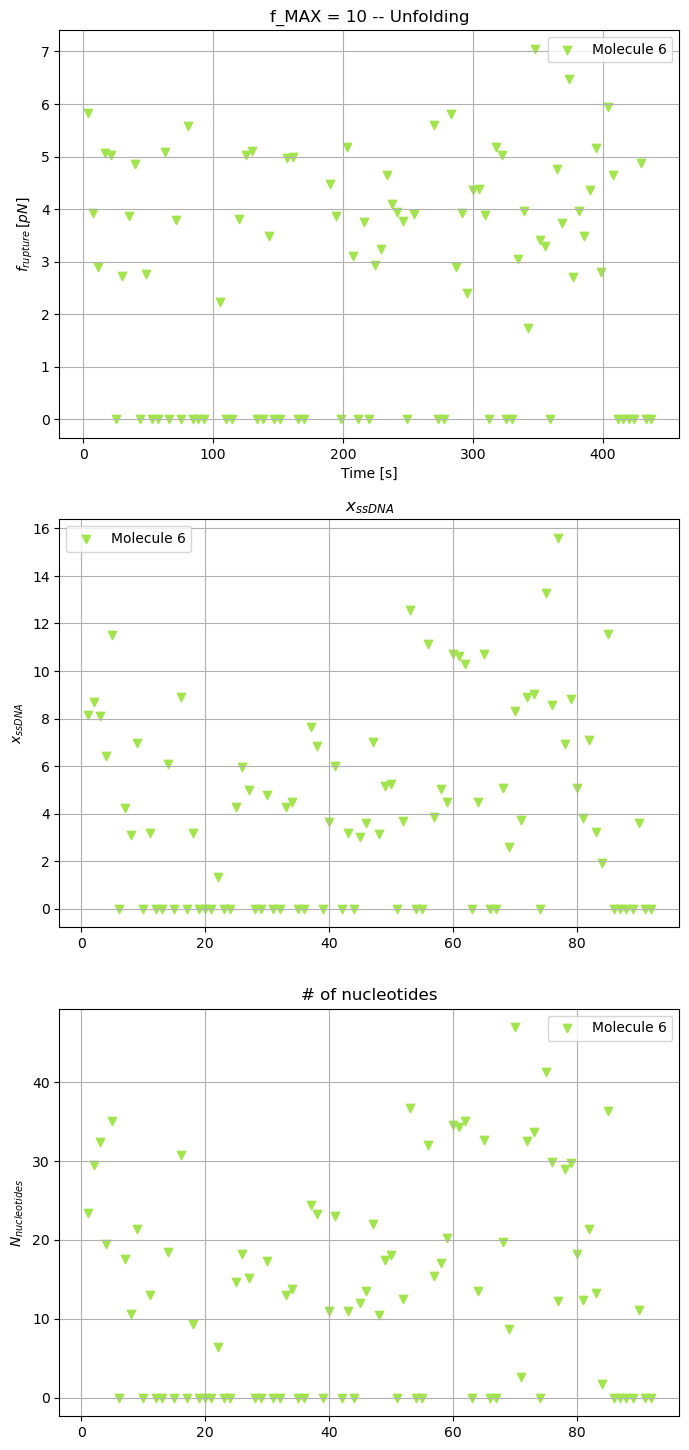

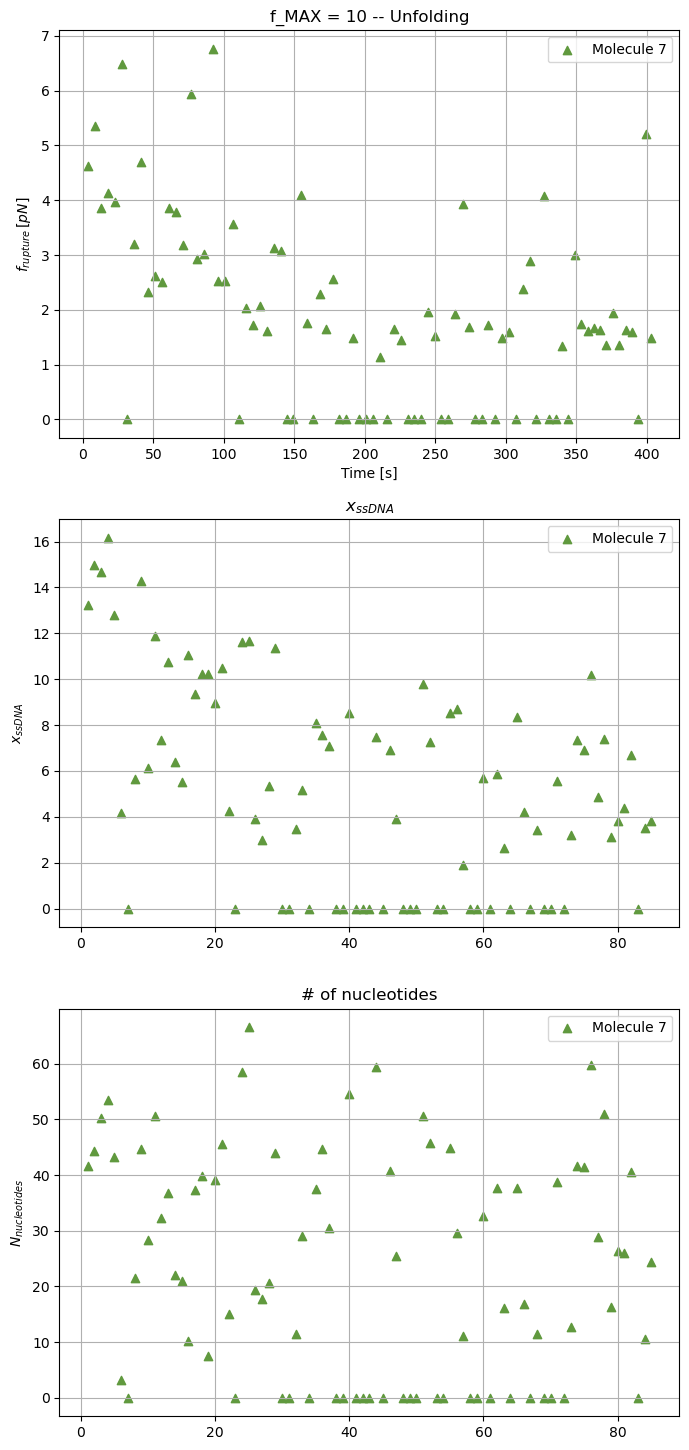

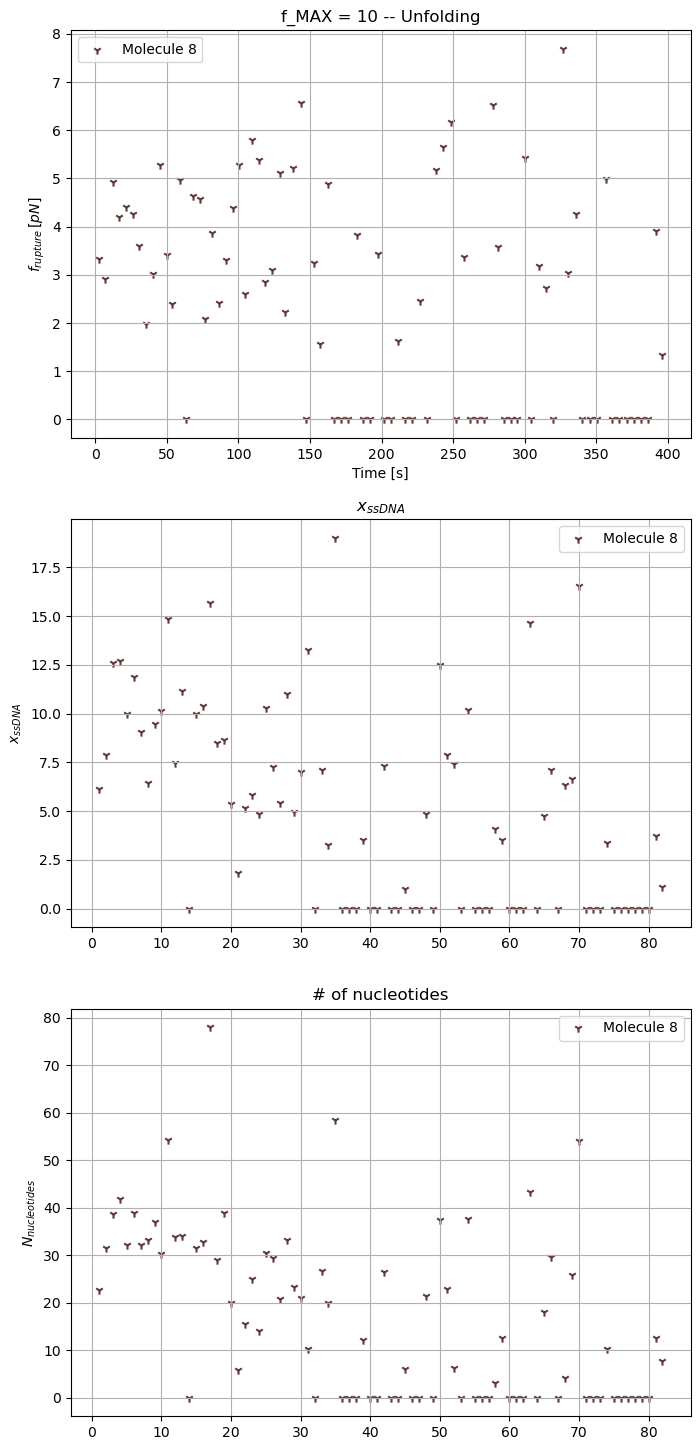

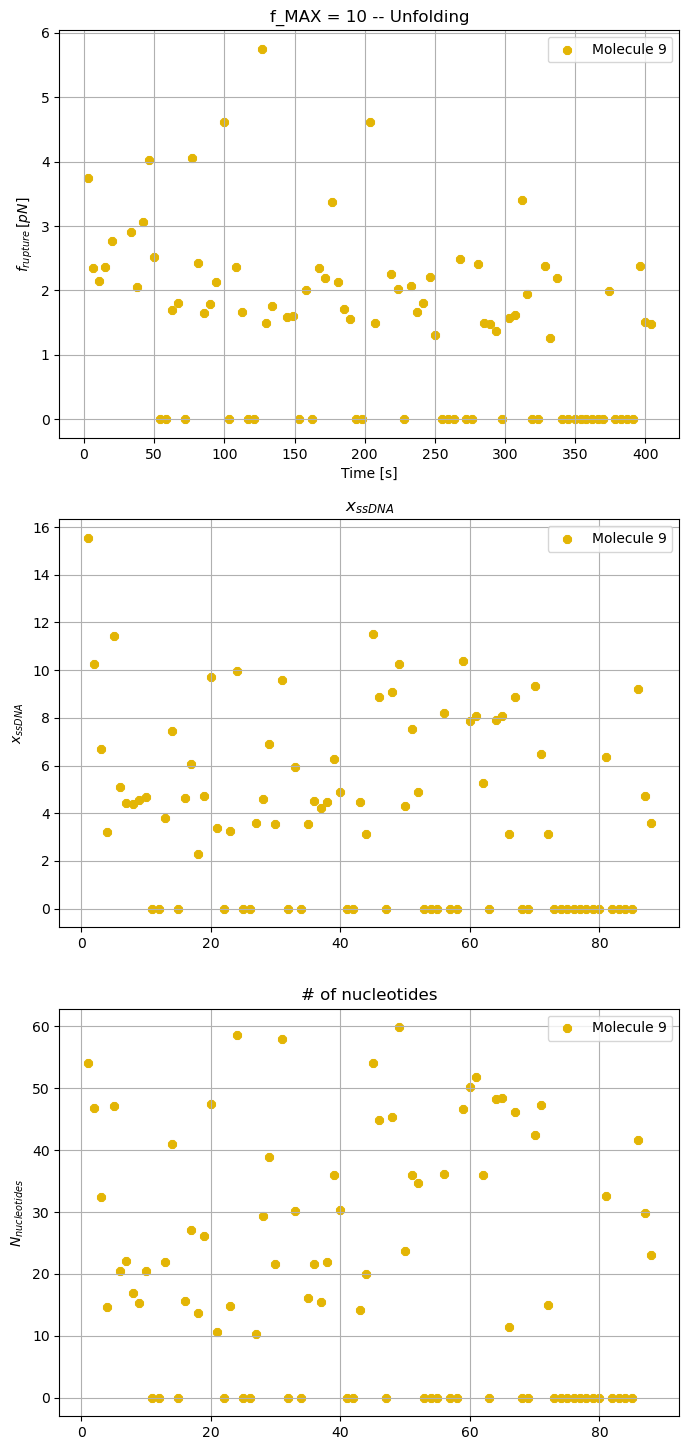

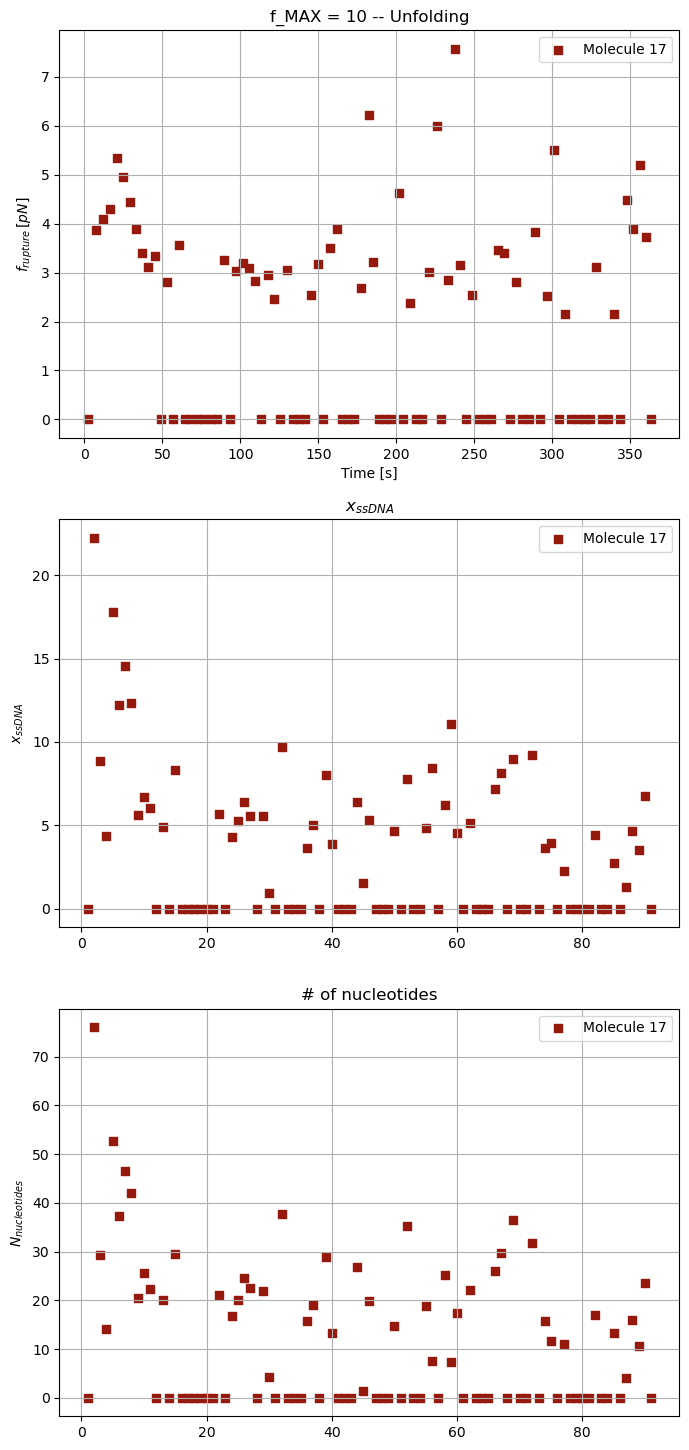

In [23]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_u[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()